In [1]:
#import libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests


In [2]:
book = []

for i in range(1,51):
  url = f'https://books.toscrape.com/catalogue/page-{i}.html'
  response = requests.get(url)
  soup = BeautifulSoup(response.content,'html.parser')
  ol = soup.find('ol')
  article = ol.find_all('article', class_='product_pod')
  for i in article:
    image = i.find('img')
    title = image.attrs['alt']
    rating = i.find(class_='star-rating')
    rating = rating['class'][1] #manipulating the index position of the 2 elelment in the list
    price = i.find(class_='price_color').get_text()[1:]
    price = float(price)
    book.append([title,rating,price])


In [3]:
len(book)

1000

In [4]:
df = pd.DataFrame(book,columns=['title','rating','price',])
df.head(20)

,title,rating,price
0,A Light in the Attic,Three,51.77
1,Tipping the Velvet,One,53.74
2,Soumission,One,50.10
3,Sharp Objects,Four,47.82
4,Sapiens: A Brief History of Humankind,Five,54.23
5,The Requiem Red,One,22.65
6,The Dirty Little Secrets of Getting Your Dream...,Four,33.34
7,The Coming Woman: A Novel Based on the Life of...,Three,17.93
8,The Boys in the Boat: Nine Americans and Their...,Four,22.60
9,The Black Maria,One,52.15


In [5]:
sidebar = soup.find('ul', class_='nav nav-list')
if sidebar:
    # If the sidebar is found, you can then work with its HTML content
    sidebar_html = sidebar.prettify()  # Get the HTML content of the sidebar

else:
    print("Sidebar not found.")

category = sidebar.find_all('li')

genres_list = []  # Create an empty list to store genres

for li_element in category:
    genre = li_element.find('a').get_text(strip=True)
    genres_list.append(genre)  # Append each extracted genre to the list

print(genres_list)  # Print the list of extracted genres



['Books', 'Travel', 'Mystery', 'Historical Fiction', 'Sequential Art', 'Classics', 'Philosophy', 'Romance', 'Womens Fiction', 'Fiction', 'Childrens', 'Religion', 'Nonfiction', 'Music', 'Default', 'Science Fiction', 'Sports and Games', 'Add a comment', 'Fantasy', 'New Adult', 'Young Adult', 'Science', 'Poetry', 'Paranormal', 'Art', 'Psychology', 'Autobiography', 'Parenting', 'Adult Fiction', 'Humor', 'Horror', 'History', 'Food and Drink', 'Christian Fiction', 'Business', 'Biography', 'Thriller', 'Contemporary', 'Spirituality', 'Academic', 'Self Help', 'Historical', 'Christian', 'Suspense', 'Short Stories', 'Novels', 'Health', 'Politics', 'Cultural', 'Erotica', 'Crime']


In [6]:
num_genres = len(genres_list)
num_genres

51

In [7]:
# Get the length of the DataFrame and the genres list
num_rows = len(df)
num_genres = len(genres_list)

# Generate random indices within the range of the genres list
random_indices = np.random.randint(0, num_genres, size=num_rows)

# Create a new column 'random_genre' in the DataFrame and assign random genres
df['genre'] = [genres_list[i] for i in random_indices]

# Display the modified DataFrame
print(df.head())  # Check the first few rows to see the added column


                                   title rating  price            genre
0                   A Light in the Attic  Three  51.77         Classics
1                     Tipping the Velvet    One  53.74         Classics
2                             Soumission    One  50.10           Novels
3                          Sharp Objects   Four  47.82  Science Fiction
4  Sapiens: A Brief History of Humankind   Five  54.23        Biography


In [8]:
df.head()

,title,rating,price,genre
0,A Light in the Attic,Three,51.77,Classics
1,Tipping the Velvet,One,53.74,Classics
2,Soumission,One,50.10,Novels
3,Sharp Objects,Four,47.82,Science Fiction
4,Sapiens: A Brief History of Humankind,Five,54.23,Biography


In [9]:
rating_mapping = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
# Update the 'rating' column in place with numeric values using the mapping
df['rating'] = df['rating'].map(rating_mapping).fillna(df['rating'])

# Display the updated DataFrame
print(df.head())


                                   title  rating  price            genre
0                   A Light in the Attic       3  51.77         Classics
1                     Tipping the Velvet       1  53.74         Classics
2                             Soumission       1  50.10           Novels
3                          Sharp Objects       4  47.82  Science Fiction
4  Sapiens: A Brief History of Humankind       5  54.23        Biography


## **exemplorary data analysis**


In [10]:
df.isnull().sum()

title     0
rating    0
price     0
genre     0
dtype: int64

In [11]:
df.describe()

,rating,price
count,1000.000000,1000.00000
mean,2.923000,35.07035
std,1.434967,14.44669
min,1.000000,10.00000
25%,2.000000,22.10750
50%,3.000000,35.98000
75%,4.000000,47.45750
max,5.000000,59.99000


In [12]:
duplicates = df[df.duplicated(keep=False)]
num_duplicates = duplicates.shape[0]
num_duplicates

0

# Data Visualization

# Analyzing Book Data: Insights and Visualizations
### Price Distribution:

Histogram or box plot showing the distribution of book prices. This helps understand the range and frequency of book prices.
### Average Price per Rating Category:

Calculate the average price for each rating category (e.g., 1-star, 2-star, etc.) and visualize it using a bar chart or line plot.
## Top-Rated Books:

Identify and visualize the top-rated books based on their ratings.
## Book Titles Word Cloud:

Create a word cloud of book titles to visualize frequently occurring words, giving an idea of popular book themes or genres.
## Correlation between Price and Rating:

Scatter plot showing the relationship between book price and rating. Analyze if there's any correlation between the two.
## Rating Distribution:

Visualize the distribution of book ratings using a histogram or bar chart.
## Average Price per Genre:

If genre information is available, calculate the average price for each genre and visualize it using a bar chart or box plot.
## Price Comparison across Categories (if available):

Compare the average price of books in different categories or genres using a bar chart or box plot.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


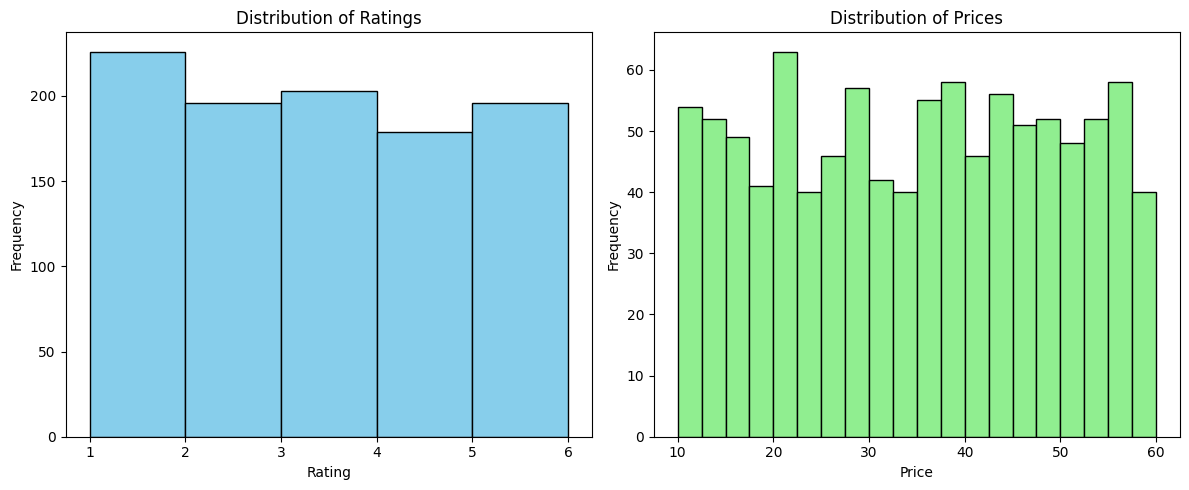

In [65]:
# Create separate subplots for ratings and prices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for ratings
bin_edges = [1, 2, 3, 4, 5, 6]  # Define custom bin edges for ratings (adjust as needed)
axs[0].hist(df['rating'], bins=bin_edges, color='skyblue', edgecolor='black')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Ratings')

# Plot histogram for prices
axs[1].hist(df['price'], bins=20, color='lightgreen', edgecolor='black')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Prices')

plt.tight_layout()
plt.show()


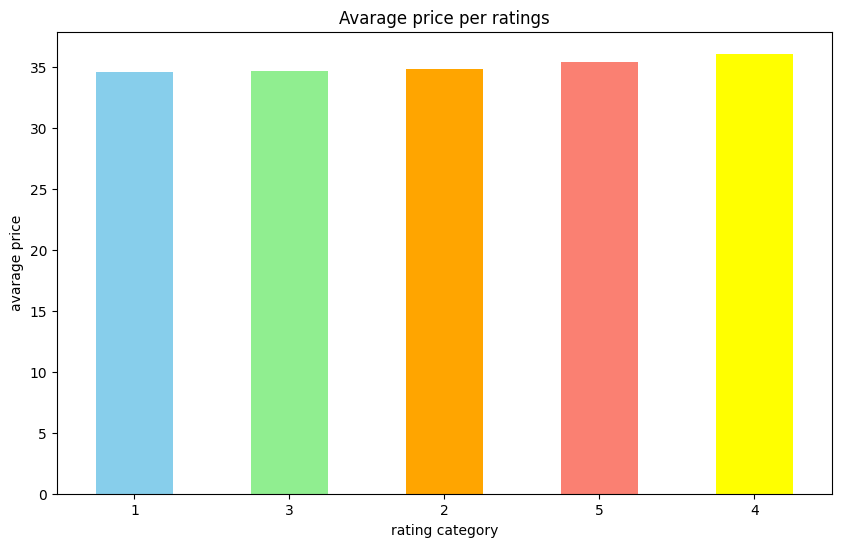

In [103]:
avg_price_per_rating = df.groupby('rating')['price'].mean().sort_values(ascending=True)

colors = ['skyblue', 'lightgreen', 'orange', 'salmon', 'yellow']
avg_price_per_rating.plot(kind='bar',figsize=(10,6),color=colors)
plt.ylabel('avarage price')
plt.xlabel('rating category')
plt.title('Avarage price per ratings')
plt.xticks(rotation=0)

plt.show()

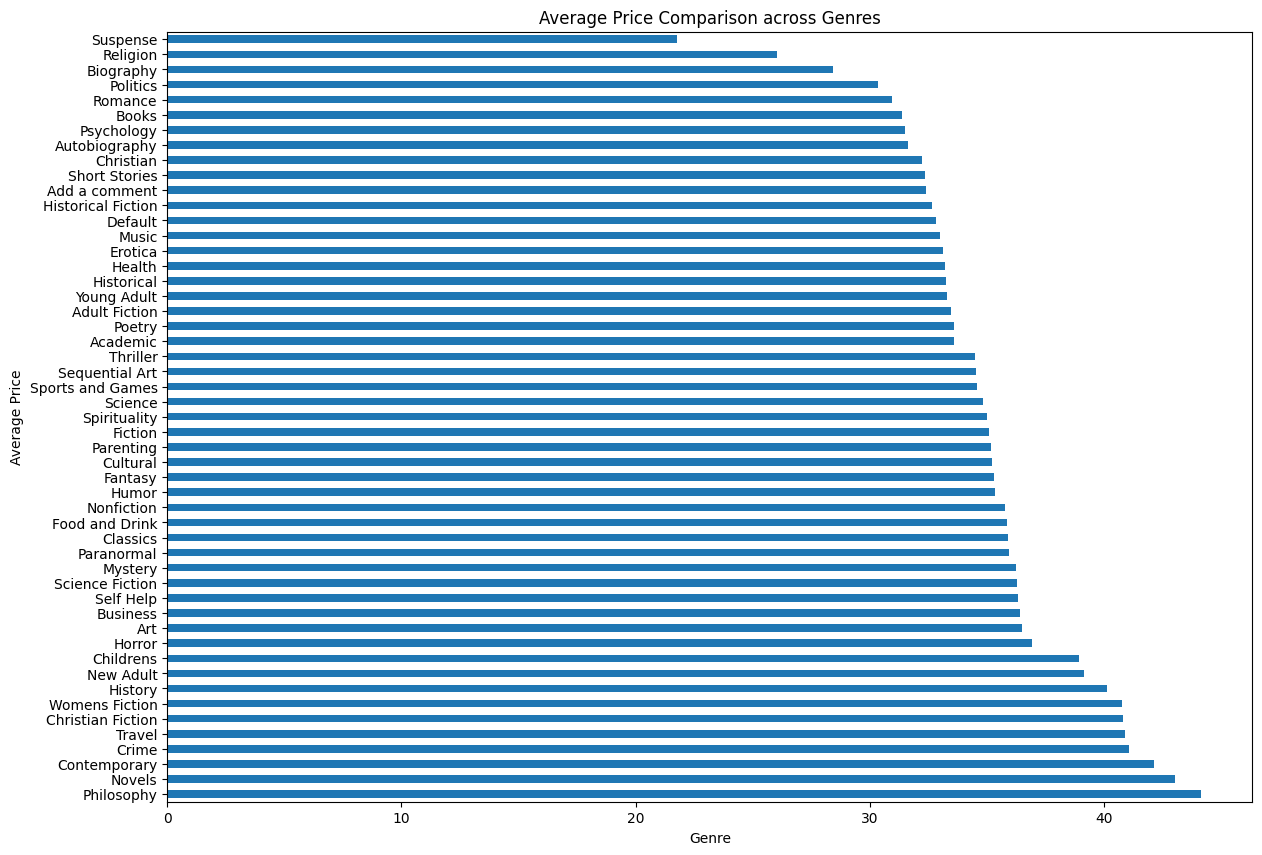

In [91]:
avg_price_per_genre = df.groupby('genre')['price'].mean().sort_values(ascending=False)

avg_price_per_genre.plot(kind='barh',figsize=(14,10))
plt.ylabel('Average Price')
plt.xlabel('Genre')
plt.title('Average Price Comparison across Genres')

plt.show()

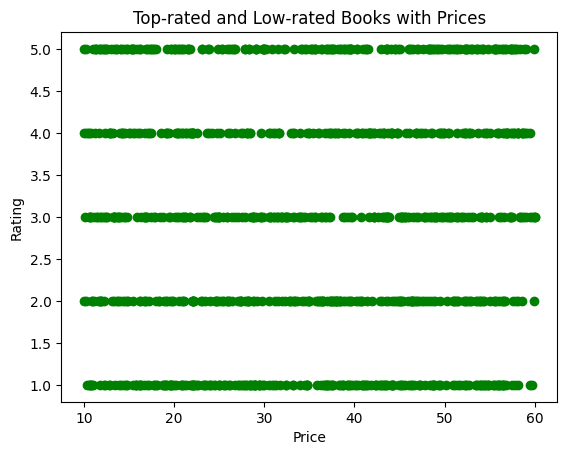

In [52]:
plt.scatter(df['price'], df['rating'], color='green')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Top-rated and Low-rated Books with Prices')

plt.show()

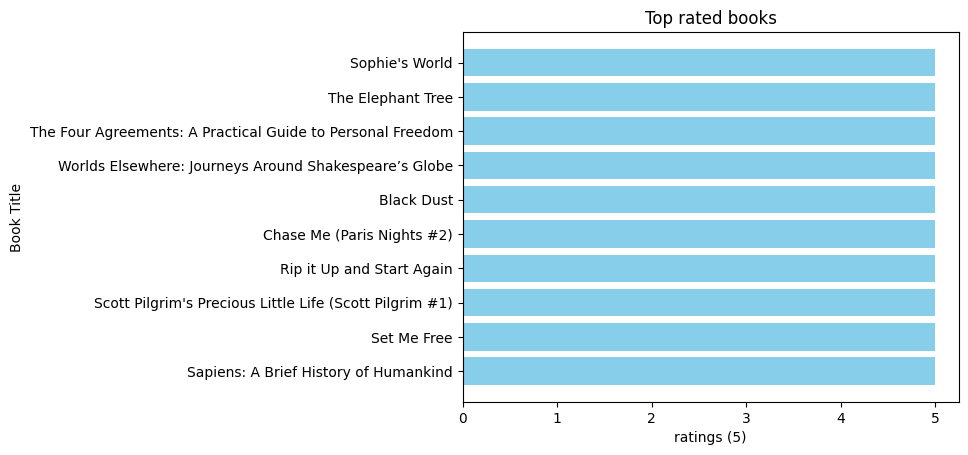

In [48]:

top_rated_books = df[df['rating']==5].head(10)

#top_rated_books.plot(kind='bar', figsize=(10,6))
plt.barh(top_rated_books['title'], top_rated_books['rating'], color='skyblue')
plt.xlabel('ratings (5)')
plt.ylabel('Book Title')
plt.title('Top rated books')
plt.show()

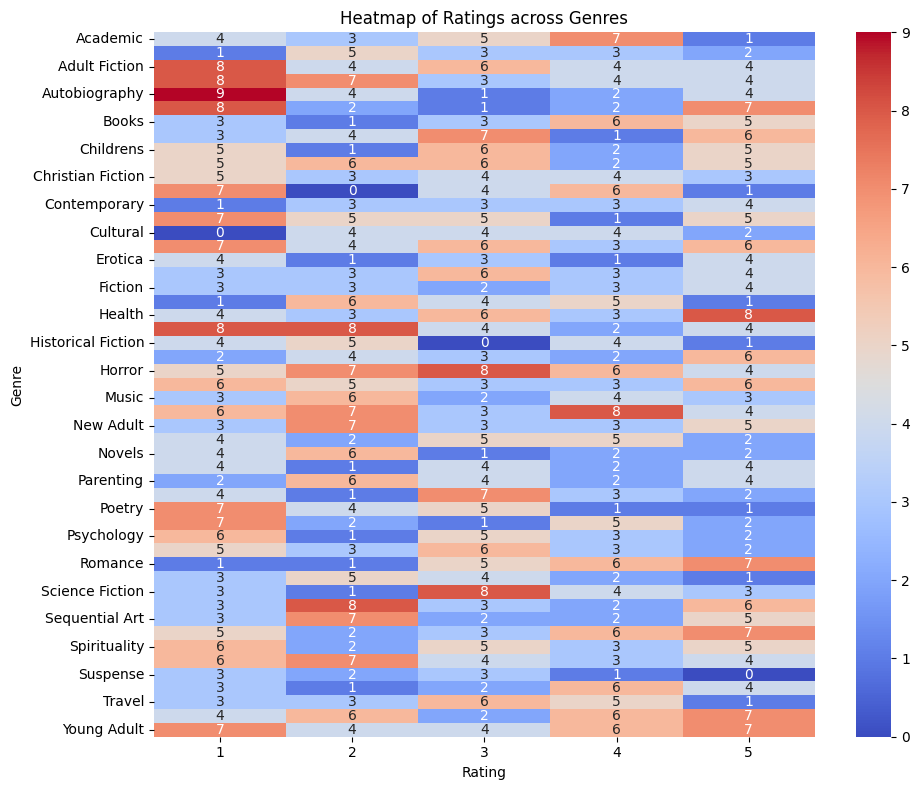

In [69]:
# Pivot the data to get counts of ratings for each genre
ratings_pivot = df.pivot_table(index='genre', columns='rating', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(ratings_pivot, cmap='coolwarm', annot=True, fmt='d')
plt.title('Heatmap of Ratings across Genres')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


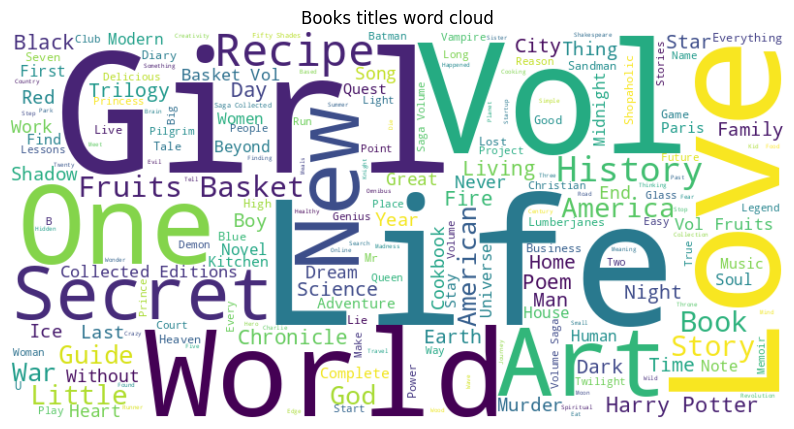

In [27]:
from wordcloud import WordCloud

books_wc = WordCloud()
all_titles = ' '.join(title for title in df['title'])

books_wc = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

plt.figure(figsize=(10, 8))
plt.imshow(books_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Books titles word cloud')
plt.show()

In [106]:
#saving to csv
df.to_csv('books_webscarpping.csv', index= False)